In [1]:
import os
import sys
SCRIPT_DIR = os.path.dirname(os.path.abspath("__file__"))
SCRIPT_DIR_PARENT = os.path.dirname(SCRIPT_DIR)
sys.path.append(os.path.dirname(SCRIPT_DIR_PARENT))

from PS2.src import util
from PS2.src.p01_lr import logistic_regression_modified
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=False)
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=False)

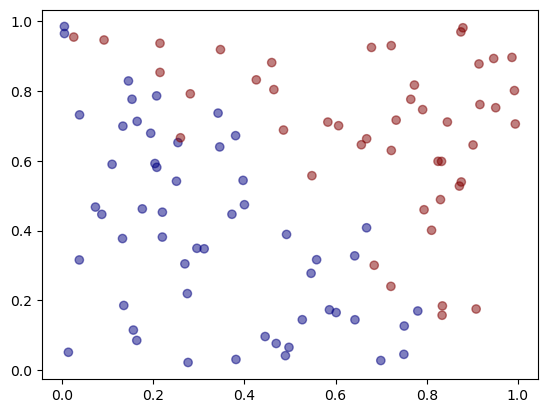

In [3]:
util.plot_points(Xa, Ya)

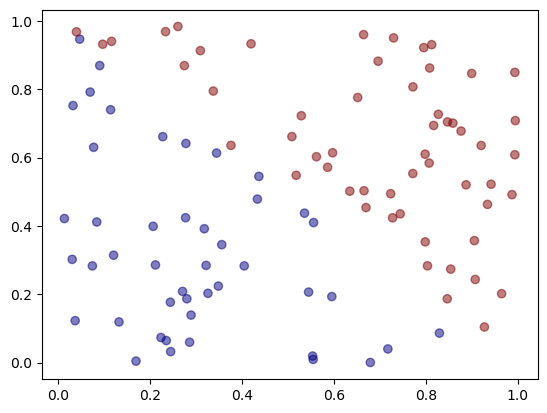

In [4]:
util.plot_points(Xb, Yb)

In [5]:
Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)

grads_a, thetas_a, _ = logistic_regression_modified(Xa, Ya)
grads_b, thetas_b, _ = logistic_regression_modified(Xb, Yb)

Converged in 30395 iterations
Could not converge in 400000 epochs


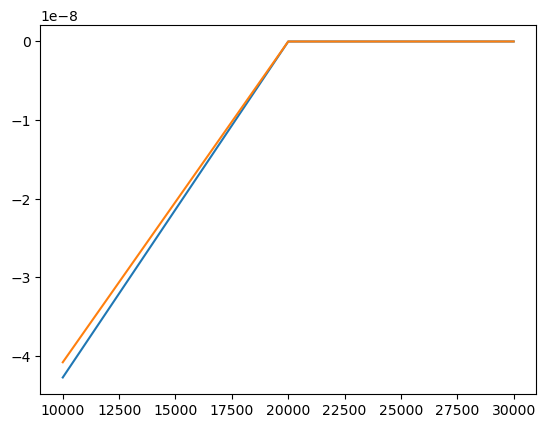

In [6]:
util.plot_line(grads_a[:, 0], grads_a[:, 1], grads_a[:, 2])

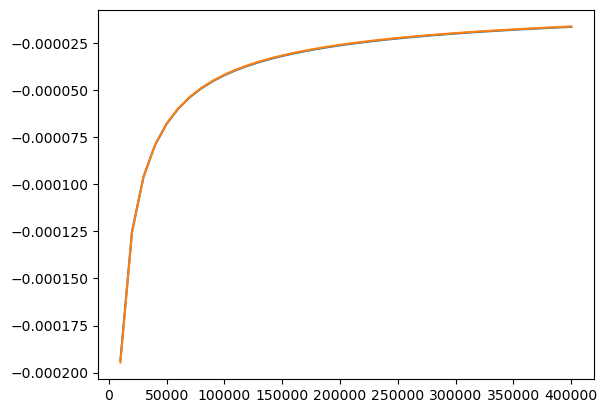

In [7]:
util.plot_line(grads_b[:, 0], grads_b[:, 1], grads_b[:, 2])

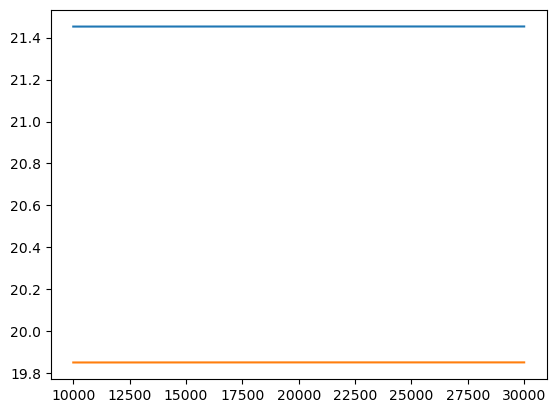

In [8]:
util.plot_line(thetas_a[:, 0], thetas_a[:, 1], thetas_a[:, 2])

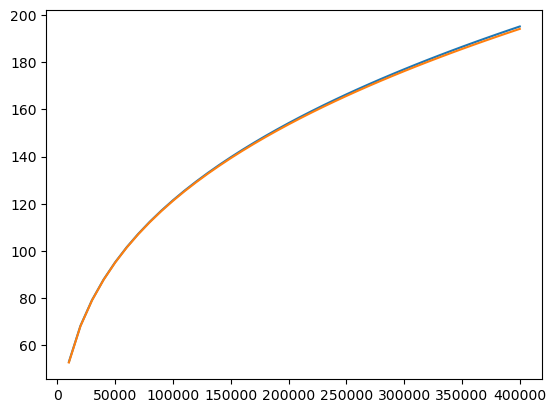

In [9]:
util.plot_line(thetas_b[:, 0], thetas_b[:, 1], thetas_b[:, 2])

# Ans 1(a)

Most notable difference between the two datasets is dataset B being linearly separable and dataset A not being linearly separable.

# Ans 1(b)

Init step:
$$\theta = zeros(X.shape[1:])$$

Update step:

$$\theta = \theta - \alpha \cdot grad$$

where:

$$grad = -\frac{1}{m} X^T \left(\frac{Y}{1 + e^{Y (X \cdot \theta)}}\right)$$
$$m = num \space of \space examples$$

Let's start by looking at each feature of X individually. The constant of integration will represent the integral values for the other features.

$$Loss(\theta) = -\int{\left(\frac{xy}{1 + e^{yx\theta}}\right)}d\theta$$
Let u = $xy\theta$. Then,
$$\frac{du}{d\theta} = xy$$
$$ du = xyd\theta$$

So, the integral becomes:
$$ Loss(\theta) = -\int{\left(\frac{1}{1 + e^u}\right)}du $$
for a single example this is:
$$ Loss(\theta) = ln(e^u + 1) - u $$
$$ Loss(\theta) = ln(e^{xy\theta} + 1) - xy\theta $$

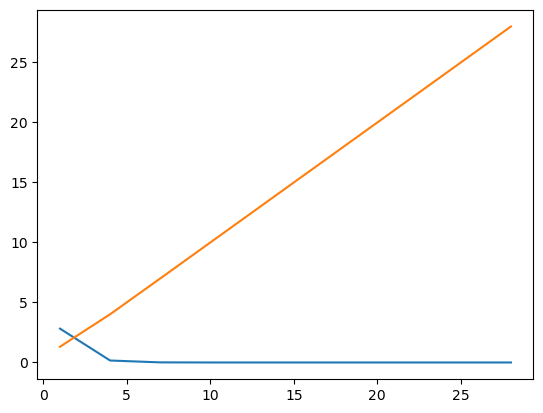

In [10]:
step = 3
max_theta = 30
min_theta = 1
n_correct = 9
n_incorrect = 1

def loss(theta, correct=True):
    xy = 1
    if not correct:
        xy = -1
    return np.log(np.exp(xy*theta) + 1) - (xy*theta)
    
    
losses = []
for theta in range(1, 30, 3):
    losses.append([theta, loss(theta, True)*n_correct, loss(theta, False)*n_incorrect])

losses = np.array(losses)
# print(losses)
util.plot_line(losses[:, 0], losses[:, 1], losses[:, 2])

$xy\theta$ is positive for a correctly classified point and negative for an incorrectly classified one.
1. For the linearly inseparable case (i.e. the case with some incorrectly classified points):  
    As an example, let's assume that there are 10 examples, 9 forecast correctly and 1 incorrectly.  
    - As $\theta$ increases, initially the decrease in loss caused by 9 correctly labeled examples is enough to encourage increasing its value, but at some point the total loss caused by the single wrong example overcomes this drop. Therefore the incorrect example acts as a regularizer.  
    - As $\theta$ increases, given that $xy\theta$ is negative for wrong labels, $e^{xy\theta}$ becomes close to 0. This means that $ln(e^{xy\theta} + 1) \rightarrow 0$, so $- xy\theta $ becomes the dominant contributor to the loss, and the $Loss$ increases quickly.  
    
2. For the linearly separable case (i.e. with all examples correctly labeled):  
   - As $\theta$ increases, the loss goes down and continues to decreases, therefore the algorithm tries to continue to increase theta in magnitude.
   - As $\theta$ increases, given that $xy\theta$ is positive for correct labels, $e^{xy\theta}$ becomes large. This means that $ln(e^{xy\theta} + 1) \rightarrow xy\theta$, so $- xy\theta $ and the $Loss \rightarrow 0$.  

However, we also observe that the gradient for the linearly separable case continues to drop over time, so if the threshold was large enough, we should see early stopping.

(c) [5 points] For each of these possible modifications, state whether or not it would lead to
the provided training algorithm converging on datasets such as B. Justify your answers.

  1. Using a different constant learning rate.  
  1. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $\frac{1}{t^2}$, where t is the number of gradient descent iterations thus far).  
  1. Linear scaling of the input features.  
  1. Adding a regularization term $||\theta||^2_2$ to the loss function.  
  1. Adding zero-mean Gaussian noise to the training data or labels.

In [2]:
# Experiments
import os
import sys
SCRIPT_DIR = os.path.dirname(os.path.abspath("__file__"))
SCRIPT_DIR_PARENT = os.path.dirname(SCRIPT_DIR)
sys.path.append(os.path.dirname(SCRIPT_DIR_PARENT))
from PS2.src import util
from PS2.src.p01_lr import logistic_regression_modified
import numpy as np

Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)

log_step = 10000
max_iters = 400000
iters = range(log_step, max_iters+1, log_step)

# 1

 ### Using a different constant learning rate.

 
  1. FOR DATASET B: If we increase the learning rate by 10 times (to 100), the delta of theta for each step would change by roughly 10 times. For the following step, the gradient should decrease by less than 10 times since it is flattening out, so the norm would actually be bigger for each iteration, and the linalg would take even longer (dataset B) to get within the threshold. Decreasing the learning rate to a small enough value could theoretically lead to convergence but the parameters learned would likely be unhelpful due to premature convergence.  
  FOR DATASET A: Increasing could lead to oscillating around the optimum leading to non-convergence, while decreasing would cause convergence to take longer.

In [10]:
# (1)
def train(learning_rates):
    labels = {"A": [], "B": []}
    ys = {"A": [], "B": []}
    for lr in learning_rates:
        print(f"training for learning rate: {lr}")
        _, _, norms_a = logistic_regression_modified(Xa, Ya, learning_rate=lr)
        _, _, norms_b = logistic_regression_modified(Xb, Yb, learning_rate=lr)
        ys["A"].append(norms_a[:, 1])
        ys["B"].append(norms_b[:, 1])
        labels["A"].append(f"A_lr_{lr}")
        labels["B"].append(f"B_lr_{lr}")
    return ys, labels
    
ys, labels = train([1, 10, 100])

training for learning rate: 1
Converged in 278192 iterations
Could not converge in 400000 epochs
training for learning rate: 10
Converged in 30395 iterations
Could not converge in 400000 epochs
training for learning rate: 100
Could not converge in 400000 epochs
Could not converge in 400000 epochs


plotting A_lr_1
plotting A_lr_10
plotting A_lr_100


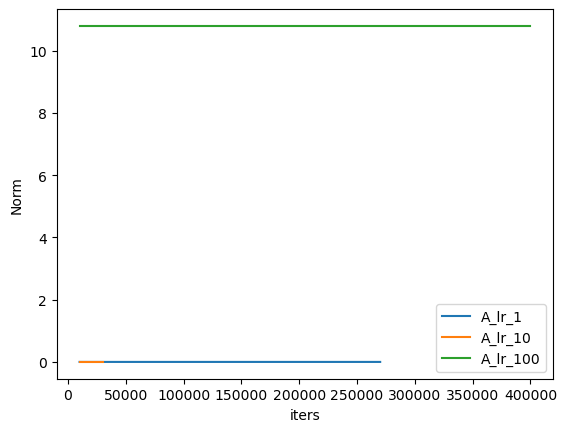

In [11]:
util.plot_lines(iters, ys = ys["A"], x_label='iters', y_label='Norm', labels = labels["A"])

plotting B_lr_1
plotting B_lr_10
plotting B_lr_100


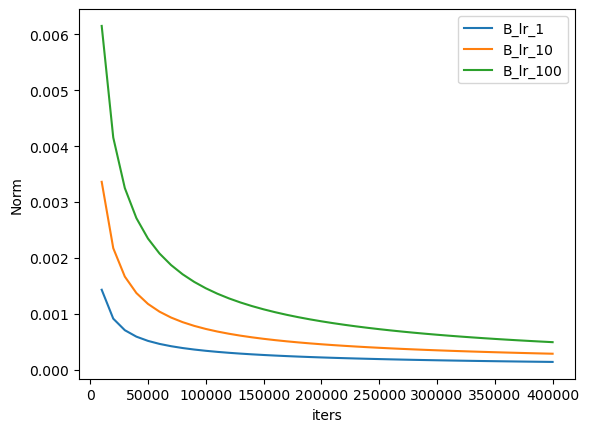

In [12]:
util.plot_lines(iters, ys = ys["B"], x_label='iters', y_label='Norm', labels = labels["B"])

# 2

### Decreasing the learning rate over time (e.g. scaling the initial learning rate by $\frac{1}{t^2}$, where t is the number of gradient descent iterations thus far).  

Both datasets converge quickly because the early stopping criteria evaluates the change in the values of theta and if learning rate drops enough, this change can become lower than the min threshold, leading to convergence. Whether this value of theta is useful or not, is a different question.

In [13]:
# (2)
decay=lambda t, lr: lr*(1/t**2)

# original learning rate
_, _, norms_a = logistic_regression_modified(Xa, Ya, learning_rate=10, decay=decay)
_, _, norms_b = logistic_regression_modified(Xb, Yb, learning_rate=10, decay=decay)


Converged in 11 iterations
Converged in 11 iterations


# 3

### Linear scaling of the input features.  

$$grad = -\frac{1}{m} X^T \left(\frac{Y}{1 + e^{Y (X \cdot \theta)}}\right)$$
$$m = num \space of \space examples$$

If $X$ is doubled, then the gradient would become:
$$grad = -\frac{1}{m} 2X^T \left(\frac{Y}{1 + e^{Y (2X \cdot \theta)}}\right)$$

In the case of correct labels, $xy\theta > 0$, which means that $-xy <= grad <= 0$.  
In the case of incorrect labels, $xy\theta < 0$, which means that $-2xy <= grad <= -xy$.

If $X$ is scaled by 5 times:  
For correct labels, the gradient approaches 0 even quicker than before.  
For incorrect labels, the gradient approaches $-\frac{5}{2}xy$.  
  
This basically means that for dataset A (linearly inseparable), this has an effect similar to that of increasing the learning rate for incorrect examples, and decreasing it for the correct examples.  
  
For dataset B (linearly separable), its effect is similar to that of reducing the overall learning rate, which we already showed above is unlikely to have a significant affect on convergence, unless the scale is large enough to force the early stopping criteria to be met.

In [20]:
# (3)
def train(scales):
    labels = {"A": [], "B": []}
    ys = {"A": [], "B": []}
    for scale in scales:
        print(f"training for scale: {scale}")
        _, _, norms_a = logistic_regression_modified(scale*Xa, Ya)
        _, _, norms_b = logistic_regression_modified(scale*Xb, Yb)
        ys["A"].append(norms_a[:, 1])
        ys["B"].append(norms_b[:, 1])
        labels["A"].append(f"A_scale_{scale}")
        labels["B"].append(f"B_scale_{scale}")
    return ys, labels
    
ys, labels = train([0.1, 1, 5])

training for scale: 0.1
Could not converge in 400000 epochs
Could not converge in 400000 epochs
training for scale: 1
Converged in 30395 iterations
Could not converge in 400000 epochs
training for scale: 5
Could not converge in 400000 epochs
Could not converge in 400000 epochs


plotting A_scale_0.1
plotting A_scale_1
plotting A_scale_5


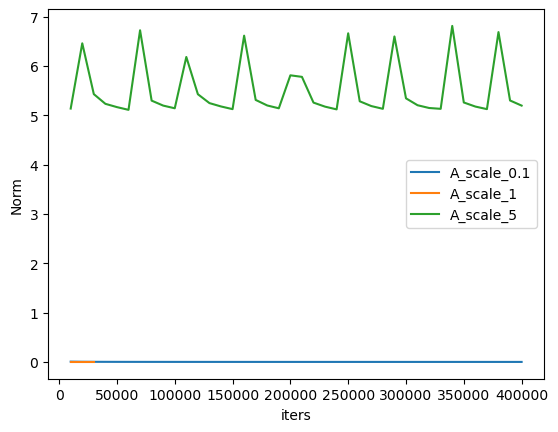

In [21]:
util.plot_lines(iters, ys = ys["A"], x_label='iters', y_label='Norm', labels = labels["A"])

plotting B_scale_0.1
plotting B_scale_1
plotting B_scale_5


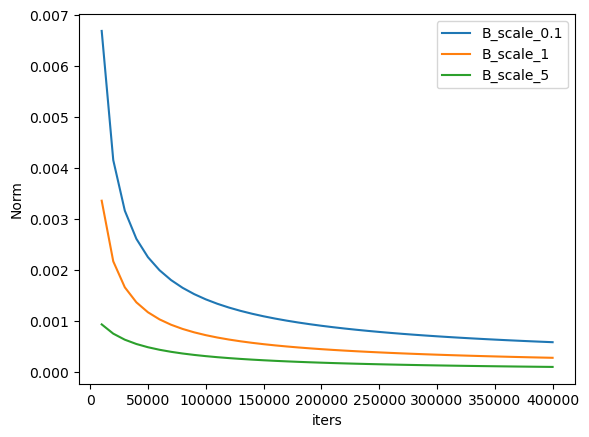

In [22]:
util.plot_lines(iters, ys = ys["B"], x_label='iters', y_label='Norm', labels = labels["B"])

# 4

### Adding a regularization term $||\theta||^2_2$ to the loss function.  